# Data Exploration and Viz

## metadata quality assessment
- [ ] check for holes in data - what is missing?
- [ ] check for errors, what needs to be cleaned up?
- [ ] plan for repairing or improving metadata

# simple exploration
- [ ] license types
- [ ] institutions
- [ ] authors, which have published the most?
- [ ] funding agencies
- [ ] 

In [27]:
import pandas as pd
from colorama import Fore,Back,Style
import itertools

print(Fore.LIGHTCYAN_EX + "all done")
print(Style.RESET_ALL)

all done



In [30]:
# load data from saved file
file = "www/LNS_openalex_full_metadata_REV3_cleaned.pkl"
REV3_df = pd.read_pickle(file)
print(REV3_df.dtypes)

id                   object
doi                  object
title                object
display_name         object
publication_year      int64
                      ...  
ids_doi              object
ids_pmid             object
ids_pmcid            object
authorships_y        object
institution_names    object
Length: 69, dtype: object


                   id
license     is_oa    
cc-by       True   27
cc-by-nc    True    1
cc-by-nc-nd True    5

total count of records: 113
number of missing licenses: id    80
dtype: int64
ACTION ITEM: Manually update license types from articles


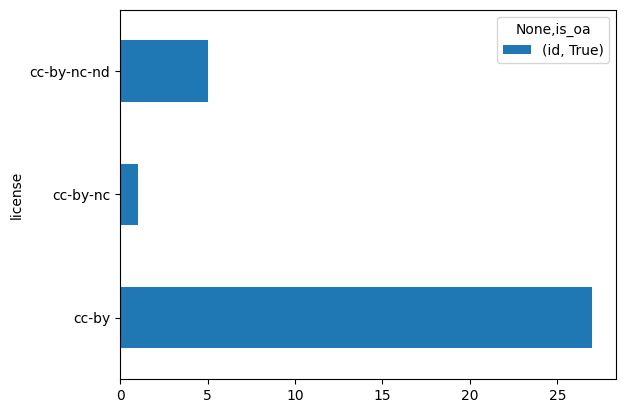

In [31]:
"""
This checks the license types in this dataset

"""

df2 = REV3_df[['license', 'id', 'is_oa']]
license_count_df = df2.groupby(['license','is_oa']).count()
print(license_count_df)
license_count_df.unstack().plot(kind='barh')

total_count = df2['id'].count()
NA_license = license_count_df.sum()

print(Fore.LIGHTCYAN_EX + f"\ntotal count of records: {total_count}")
print(Fore.MAGENTA + f"number of missing licenses: {total_count-NA_license}")

print(Fore.LIGHTYELLOW_EX + "ACTION ITEM: Manually update license types from articles")



In [32]:
"""
This looks at the spread of institutions affiliated with the authors
of these studies
"""


def flatten(lst):
    return list(itertools.chain.from_iterable(lst))

# Apply the flatten function to each row in your DataFrame
flattened_insts = REV3_df[['institution_names']].apply(flatten)

list_of_institutions = []
for i in flattened_insts['institution_names']:
    list_of_institutions.append(i[0])

list_of_institutions_df = pd.DataFrame(list_of_institutions ,columns=['inst_name'])
print(Fore.LIGHTMAGENTA_EX + f"number of institutions: {list_of_institutions_df.count()}")
inst_value_counts = list_of_institutions_df['inst_name'].value_counts()
print(Fore.CYAN + f"counts of each:\n {inst_value_counts}")

""" 
insert bar graph here
"""

number of institutions: inst_name    641
dtype: int64
counts of each:
 inst_name
Children's Hospital of Eastern Ontario            59
McMaster University                               52
University of Toronto                             45
University of British Columbia                    32
University of Ottawa                              28
                                                  ..
Centre Hospitalier Universitaire de Sherbrooke     1
Orygen Youth Health                                1
Athabasca University                               1
Flinders University                                1
West Park Healthcare Centre                        1
Name: count, Length: 120, dtype: int64


' \ninsert bar graph here\n'

In [33]:
"""
Let's look at authorships_y next
how many authors are there?
how many occurrances of authors are there, (as a proxy for # of pubs authored by each)
 """
authors_list = []
authors_subset = REV3_df['authorships_y']
for label,content in authors_subset.items():
    for i in content:
        authors_list.append(i)
authors_list_df = pd.DataFrame(authors_list, columns=['authors'])
print(Fore.LIGHTMAGENTA_EX + f"{authors_list_df.value_counts()}")
print(Fore.LIGHTCYAN_EX + f"\nnumber of authors: {len(set(authors_list))}")
print(Fore.LIGHTGREEN_EX + f"\nmax articles by authors: {authors_list_df.value_counts().max()}")


authors                 
Dean Kriellaars             12
Patricia E. Longmuir        11
John Cairney                10
Mark S. Tremblay            10
Joel D. Barnes               9
                            ..
Herbert P. von Schroeder     1
Helen Novak Lauscher         1
Hedvig Nordeng               1
Heather J. Clark             1
Özge Bilgili                 1
Name: count, Length: 383, dtype: int64

number of authors: 383

max articles by authors: 12


<Axes: ylabel='funder_name'>

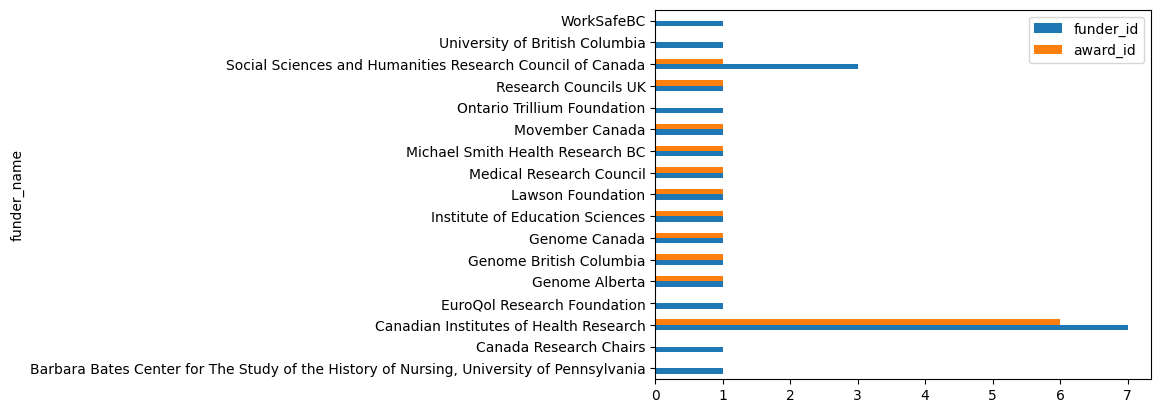

In [77]:
# let's look at funding next in the 'grants' column
# I may need to look at the authorships column again to see if this matches up. 

funders_list = []
funders_subset = REV3_df['grants']
for label,content in funders_subset.items():
    if content:
        try:
            for i in content:
                funder_name = i.get('funder_display_name',"")
                funder_id = i.get('funder',"")
                award_id = i.get('award_id',"")
                funders_dict={'funder_name':funder_name,'funder_id':funder_id,'award_id':award_id}
                funders_list.append(funders_dict)
        except KeyError as e:
            funders_dict = {'funder_name': None, 'funder_id': None, 'award_id': None}
            funders_list.append(funders_dict)
    else:
        funders_dict = {'funder_name': None, 'funder_id': None, 'award_id': None}
        funders_list.append(funders_dict)
funders_list_df = pd.DataFrame(funders_list)

# do some groupby magic
grouped_funders = funders_list_df.groupby('funder_name').count()
grouped_funders
grouped_funders.plot( kind='barh')